In [38]:
%matplotlib inline
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.manifold import TSNE
from glob import iglob as glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

## Cluster by LIWC
Doesn't seem enough to discern genre

In [11]:
liwc_files = glob("../data/LIWC_by_movie/*")

In [12]:
movies = {}
for f in liwc_files:
    try:
        data = pd.read_csv(f, sep = "\t")
        movies[f] = data.ix[:, 1:].mean(axis = 0)
    except:
        continue

In [14]:
values = np.matrix([v for k, v in values.items()])

In [15]:
values.shape

(1194, 78)

In [42]:
t_sne = TSNE(n_components=2, random_state=43, n_iter=10000)
emdeb = t_sne.fit_transform(values)

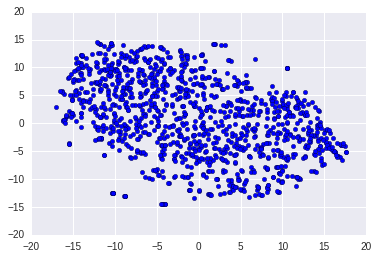

In [43]:
plt.scatter(emdeb[:, 0], emdeb[:, 1])
plt.show()

## Cluster by graph features

In [46]:
from collections import Counter
import networkx as nx

In [44]:
scripts_utts = glob("../data/utterances_with_charnames/*")

In [48]:
movies = {}

for f in scripts_utts:
    with open(f) as inpt:
        
        prev_spkr = ""
        transitions = []
        for line in inpt:
            try:
                cur_spkr, utt = line.strip().split(" => ")
                if cur_spkr!=prev_spkr:
                    transitions.append((prev_spkr, cur_spkr))
                prev_spkr = cur_spkr
            except:
                continue
                
        # Filter empty speakers
        transitions = list(filter(lambda x: len(x[0])>0 and len(x[1])>0, transitions))
        
        weights = Counter(transitions)
        char_list = np.array(sorted(list(set([y for x in map(lambda x: [x[0], x[1]], weights.keys()) for y in x]))))

        # Create adj matrix
        adj = np.zeros((len(char_list), len(char_list)))
        for i in range(len(char_list)):
            for j in range(len(char_list)):
                adj[i, j] = weights[(char_list[i], char_list[j])] > 0

        # Make it binary
        adj = (adj > 0).astype(int)
        
        movies[f] = nx.from_numpy_matrix(adj)

In [51]:
def graphFunctionals(G):
    return [nx.number_of_nodes(G),
            nx.number_of_edges(G),
            nx.average_node_connectivity(G),
            nx.average_shortest_path_length(G),
            nx.average_clustering(G)]

In [52]:
values = np.matrix([graphFunctionals(G) for _, G in movies.items()])
values.shape

(1189, 5)

In [53]:
t_sne = TSNE(n_components=2, random_state=43, n_iter=10000)
emdeb = t_sne.fit_transform(values)

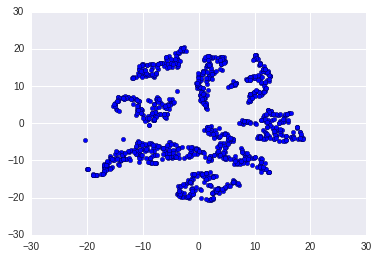

In [54]:
plt.scatter(emdeb[:, 0], emdeb[:, 1])
plt.show()